In [1]:
import timm
from albumentations.pytorch import ToTensorV2
import albumentations as A
from torchsummary import summary
import cv2
import matplotlib.pyplot as plt
import torch

C:\Users\likeo\anaconda3\envs\pytorch\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = timm.create_model('resnet50', pretrained='imagenet', 
                                         in_chans=3)


In [3]:
summary(model, (3, 224, 224), device="cpu")

C:\Users\likeo\anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [4]:
transform = A.Compose(
                [
                    A.Resize(height=224, width=224),
                    A.Normalize(
                        mean=[0.485, 0.456, 0.406], 
                        std=[0.229, 0.224, 0.225],
                        max_pixel_value=255., 
                        p=1.0
                    ),
                    ToTensorV2(),
                ])

In [5]:
with open('imagenet-idx.txt', 'r') as f:
    imagenet_cls = [line.strip() for line in f]

In [54]:
image = cv2.imread('images\\bow.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [55]:
transform_image = transform(image=image)

In [56]:
transform_image['image'].shape, transform_image['image'].mean(), transform_image['image'].std()

(torch.Size([3, 224, 224]), tensor(0.3679), tensor(1.1116))

In [57]:
model.eval()
output = model(transform_image['image'].unsqueeze(0))
probs = torch.nn.functional.softmax(output, dim=1)

In [58]:
pred = torch.topk(probs, 5,axis=-1)

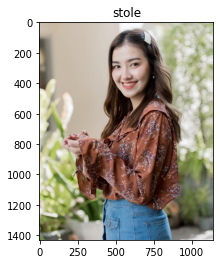

In [59]:
label = imagenet_cls[pred.indices[0][0]]
plt.title(label)
plt.imshow(image)

In [277]:
torch.save(model.state_dict(), 'model.pth')